Given a D × D square matrix B, we frequently want to factor or express B in terms of other matrices, for instance maybe taking the square root of B. In this problem, for a given matrix B, we want to find a (potentially non-square, non-symmetric) matrix A such that B = AT A.
– We can generate such a B by randomly generating a k × D matrix A ̃, with each element selected as a standard normal random variable (mean 0, variance 1), and computing B = A ̃T A ̃. From B, we would like to (potentially) recover A ̃.

– Consider the following approach: for any matrix A, define L as
L(A)=∑∑(B−A^A )^2(i,j)
i=1 j=1
the sum of the squares of all the differences between the elements of B and AT A. We want to find A to
make L as small as possible.
– For a given matrix A, let G(A) be the matrix of derivatives so that Gi,j = ∂/∂A(i,j)
G = 4A (A^T A − B).
– We can try to find A to minimize L by implementing gradient descent: for any given A, we can improve
it by taking
Anew = A − αG(A)
where α is a small positive constant. For sufficiently small α, you’ll get that L(Anew) < L(A), and this process can be iterated to minimize L. If we can get L(A) to converge to 0, then we have discovered a solution to B = AT A.
– Generate a random B as above, taking D = 10,k = 10, and taking A as a random initial matrix, implement this process to show that L decreases over time to 0 - graph your results.
– For a given B (D = 10, k = 10), do you recover the same A every time, for different initial starting points? Why or why not.
– Generating B randomly as above, with D = 5, k = 10, suppose that the ‘true’ value of k is forgotten. Try to find A for different values of k. What do you notice about the loss for different k? Can you recover the ‘true’ dimension?
– Think about the relationship between the columns of A and the matrix AT A, and use this to explain the results of the previous two bullet points.
– What happens if you try to take B as the identity matrix? What does the solution A represent (for any k that works)?
– What happens if you try to take B as the diagonal matrix of all 1s, except for the bottom right corner which is −1? What does the solution A represent (for any k that works)?

### 1. Generate a random B as above, taking D = 10,k = 10, and taking A as a random initial matrix, implement this process to show that L decreases over time to 0 - graph your results.

In [160]:
from asyncio import as_completed
import numpy as np
import matplotlib.pyplot as plt


# Generating Random Matrices

1. Here we generate random matrix A1 that will be used to find B using the formula B = A^T.A
2. Then we generate A as a random initial matrix.


In [180]:
#Generating Random Matrices B and A. B is calculated using A1^T A1.

A1 = np.random.normal(0,1, size = (10,10))

B = np.matmul(np.transpose(A1), A1)

print('\n\nB\n\n',B)

A = np.random.normal(0,1, size = (10,10))

print('\n\nA\n\n', A)



B

 [[13.6923519  -9.07793649 -4.50512925  0.77446994  3.27618304  3.46194101
  -5.98647541 -2.65367677 -0.86588146 -2.12495758]
 [-9.07793649  9.57305652  4.52773835 -1.74642877 -0.7655098  -1.83332652
   1.89199848  1.92929697  1.04509012 -0.96520331]
 [-4.50512925  4.52773835  4.35151228  0.1302712  -0.87640285 -2.10112082
   1.66951563  0.80793311 -1.06684382 -0.65440445]
 [ 0.77446994 -1.74642877  0.1302712   7.08537631  1.48539442 -1.9231863
   0.39812249 -2.23552211  1.87134994  1.13626716]
 [ 3.27618304 -0.7655098  -0.87640285  1.48539442  8.46635241  3.75566616
   0.48636607  1.60165627  2.72257958 -2.37523149]
 [ 3.46194101 -1.83332652 -2.10112082 -1.9231863   3.75566616 11.5250296
   2.04716407 -1.28380832  2.38620472 -4.28829159]
 [-5.98647541  1.89199848  1.66951563  0.39812249  0.48636607  2.04716407
   9.72662733  1.18803646 -1.38770006  1.96006254]
 [-2.65367677  1.92929697  0.80793311 -2.23552211  1.60165627 -1.28380832
   1.18803646 13.34837138 -0.69329361  0.874444

# Gradient Descent Algorithm

1. Implementing the Gradient Descent Algorithm using Alpha as a paramenter step-size and running it for 3000 iterations.
2. We append the Loss values in an array and return this array to plot the results.

In [183]:
def Gradient_Descent(A, B, alpha):
    i = 0
    LArray = []
    while i < 3000:
        A_Squared = np.matmul(np.transpose(A), A)           #Computing A^T.A
        G = np.dot(4,np.matmul(A,np.subtract(A_Squared, B)))     #Computing G = 4A(A^T.A - B)
        
        LDiff = np.subtract(B, A_Squared)
        LSquared = np.matmul(LDiff, LDiff)
        L = np.sum(LSquared)                   #Computing Loss Function
        LArray.append(L)
    
        A = np.subtract(A, np.dot(alpha, G))

        i=i+1
    
    print('Gradient Descent Successful')
    return LArray

## Printing The Loss Array

Here we call the gradient descent algorithm with step size as 0.003 and display the final 100 values from the Loss Array.

In [184]:
LossArray = Gradient_Descent(A, B, 0.003)
print('\n\nLoss Array - \n\n\n', LossArray[2900:3000])


Gradient Descent Successful


Loss Array - 


 [4.938762304749297e-28, 4.127221648503181e-28, 4.442519491558704e-28, 4.469390066142795e-28, 4.789125251790186e-28, 4.613110662312748e-28, 4.507600516239438e-28, 4.487385955543149e-28, 4.694461943163665e-28, 5.0336721324087e-28, 4.779264490474924e-28, 5.142387025909471e-28, 5.6107731883844465e-28, 5.383482640067642e-28, 4.117114368155037e-28, 4.442519491558704e-28, 3.93345768865827e-28, 3.894569311221203e-28, 4.8609239201169425e-28, 4.432658730243442e-28, 4.772854995620003e-28, 4.442272972525823e-28, 4.398885622738667e-28, 4.447696391249217e-28, 4.960209460609993e-28, 4.821912283163435e-28, 4.778771452409161e-28, 4.55838343701304e-28, 4.490837222003491e-28, 4.377438466877971e-28, 4.050554229277014e-28, 4.26403971175245e-28, 3.980049785872886e-28, 4.1787441263754285e-28, 4.515489125291648e-28, 4.927175910203863e-28, 4.436356515736665e-28, 4.820679687999027e-28, 4.959469903511349e-28, 4.933831924091666e-28, 4.822651840262079e-28, 4.689778081

# Plotting The Results

Here we plot the Loss values with respect to time or the number of iteration.

We can see clearly from the graphs that Loss value decreases with each iteration and we achieve a Loss equivalent to 10^-28.

We plot the graph in the log scale to display the decrease in loss values as time goes on. It shows that the loss decreases continuously and approaches 0. 

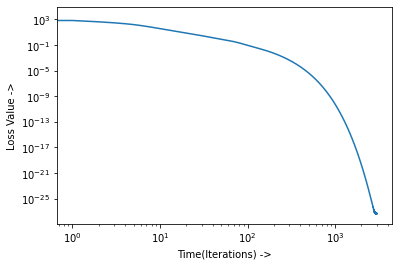

In [185]:
def plotResults(LossArray):
    plt.plot(LossArray[0:3000])
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel('Loss Value ->')
    plt.xlabel('Time(Iterations) ->')
    plt.show()


plotResults(LossArray)



### 2. For a given B (D = 10, k = 10), do you recover the same A every time, for different initial starting points? Why or why not.

In [2]:
from asyncio import as_completed
import numpy as np
import matplotlib.pyplot as plt

# Generating Random Matrices

1. Here we generate random matrix A1 that will be used to find B using the formula B = A^T.A
2. Then we generate A as a random initial matrix.

In [33]:
A1 = np.random.normal(0,1, size = (10,10))

B = np.matmul(np.transpose(A1), A1)

print('\n\nB\n\n',B)

A = np.random.normal(0,1, size = (10,10))

print('\n\nA\n\n', A)



B

 [[ 7.71499194 -2.29471048 -2.64940184 -4.80035902 -0.81929932  3.01011002
  -0.41631896 -3.23857869  0.47623295 -1.1147709 ]
 [-2.29471048  5.97493559 -1.98371014  1.45640625  1.16103696 -1.21793271
  -1.84156009  0.47316167  3.52201173 -5.14571638]
 [-2.64940184 -1.98371014 10.21530482  3.82260114 -1.26164269  4.08984209
   0.89963268 -2.04914904  1.10757967  7.33975698]
 [-4.80035902  1.45640625  3.82260114  8.98569423 -0.84293565 -2.05372398
   1.93493924 -0.44876825  2.63788371  2.04556762]
 [-0.81929932  1.16103696 -1.26164269 -0.84293565  2.2170791  -0.75748227
  -1.55279305  1.99273069  1.14167687 -2.91635168]
 [ 3.01011002 -1.21793271  4.08984209 -2.05372398 -0.75748227 14.06231371
  -0.46307079 -3.97223754  4.43963179  2.0143932 ]
 [-0.41631896 -1.84156009  0.89963268  1.93493924 -1.55279305 -0.46307079
   3.43670753 -1.65557436 -2.5634832   1.45479623]
 [-3.23857869  0.47316167 -2.04914904 -0.44876825  1.99273069 -3.97223754
  -1.65557436 10.06878074 -1.61356455  1.1926

# Gradient Descent Algorithm

1. Implementing the Gradient Descent Algorithm using Alpha as 0.009 and running it for 3000 iterations.
2. We return the New A generated after the Gradient Descent completion.

In [34]:
def plotResults(LossArray):
    plt.plot(LossArray[0:3000])
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel('Loss Value ->')
    plt.xlabel('Time(Iterations) ->')
    plt.show()

def Gradient_Descent(A, B, alpha):
    i = 0
    LArray = []

    while i < 3000:
        A_Squared = np.matmul(np.transpose(A), A)
        G = np.dot(4,np.matmul(A,np.subtract(A_Squared, B)))
        
        LDiff = np.subtract(B, A_Squared)
        LSquared = np.matmul(LDiff, LDiff)
        L = np.sum(LSquared)
        LArray.append(L)
    
        A = np.subtract(A, np.dot(alpha, G))

        i=i+1
    
    print('Gradient Descent Successful')
    plotResults(LArray)
    return A


# Calling Gradient Descent

We call Gradient Descent here and save the new A in A_New

Gradient Descent Successful


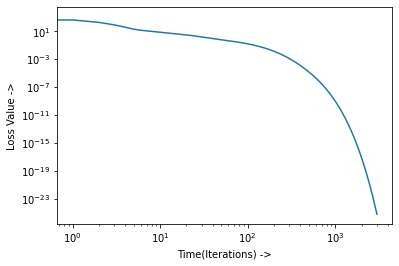



New A - 


 [[-1.06425928e+00  1.08137671e+00  8.83152926e-01  1.07452024e+00
   6.78403265e-01  3.83635528e-01 -5.57505851e-01  8.45369134e-02
   8.45109046e-01  8.31412423e-01]
 [-7.76874436e-01  2.26355351e-01 -4.42613829e-01  9.17953527e-01
  -5.19181169e-01  9.77009735e-01  7.78257212e-01 -8.56705962e-01
  -3.27086257e-01  3.67551972e-02]
 [-9.73817920e-01 -6.89941547e-02  9.31919977e-01  1.24918412e+00
   8.91603466e-02 -2.36612227e-01 -1.40931893e-01  1.64337241e+00
   3.35377507e-01  2.96225986e-01]
 [ 5.04647767e-01 -4.32013973e-01  4.54947935e-01 -3.57454377e-01
   1.37487056e-01  2.50889050e+00 -7.61807419e-01  1.17871631e-01
   1.71555904e+00  5.25896224e-01]
 [-1.16060212e+00  8.73478980e-03  8.85025996e-01 -9.08131457e-01
   3.93606345e-01  2.08773214e-01 -4.71975566e-01  1.94961166e-03
  -5.97601957e-01 -3.47595601e-01]
 [ 6.90360278e-01 -9.72787453e-01 -6.12902120e-01 -1.42582724e-01
   6.16837648e-01 -2.29804654e-01  1.40203438e-01 -6.61620743e-01
  -4.03665287e-02 -

In [40]:
A_New = Gradient_Descent(A, B, 0.005)
print('\n\nNew A - \n\n\n', A_New)


# Checking Accuracy of New A

Here we check how accurately we get the B matrix from the New A and compare the differences between the New Calculated B and the Original B.


In [41]:
B_New = np.matmul(np.transpose(A_New), A_New)
print('New Calculated B - \n\n', B_New)

print('\n\nDifference between New B and Original B - \n\n', np.subtract(B_New, B))

New Calculated B - 

 [[ 7.71499194 -2.29471048 -2.64940184 -4.80035902 -0.81929932  3.01011002
  -0.41631896 -3.23857869  0.47623295 -1.1147709 ]
 [-2.29471048  5.97493559 -1.98371014  1.45640625  1.16103696 -1.21793271
  -1.84156009  0.47316167  3.52201173 -5.14571638]
 [-2.64940184 -1.98371014 10.21530482  3.82260114 -1.26164269  4.08984209
   0.89963268 -2.04914904  1.10757967  7.33975698]
 [-4.80035902  1.45640625  3.82260114  8.98569423 -0.84293565 -2.05372398
   1.93493924 -0.44876825  2.63788371  2.04556762]
 [-0.81929932  1.16103696 -1.26164269 -0.84293565  2.2170791  -0.75748227
  -1.55279305  1.99273069  1.14167687 -2.91635168]
 [ 3.01011002 -1.21793271  4.08984209 -2.05372398 -0.75748227 14.06231371
  -0.46307079 -3.97223754  4.43963179  2.0143932 ]
 [-0.41631896 -1.84156009  0.89963268  1.93493924 -1.55279305 -0.46307079
   3.43670753 -1.65557436 -2.5634832   1.45479623]
 [-3.23857869  0.47316167 -2.04914904 -0.44876825  1.99273069 -3.97223754
  -1.65557436 10.06878074 -1.

### As seen above the difference is almost neglegible. Thus we can say that A_New matrix gives the same B as expected.

# Generating Random A (Different Initial Starting Points)

In [42]:
A2 = np.random.normal(0,1, size = (10,10))
A3 = np.random.normal(0,1, size = (10,10))
A4 = np.random.normal(0,1, size = (10,10))


## Running Gradient Descent on A2, A3, A4

Gradient Descent Successful


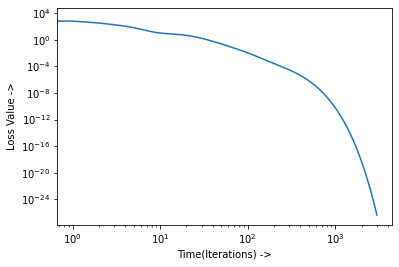

Gradient Descent Successful


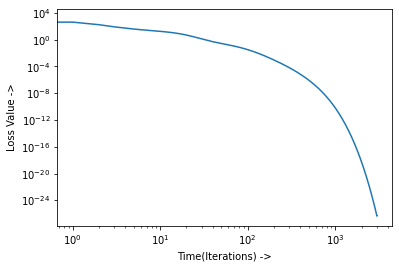

Gradient Descent Successful


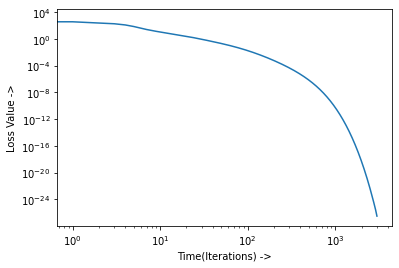

In [43]:
A2_New = Gradient_Descent(A2, B, 0.005)
A3_New = Gradient_Descent(A3, B, 0.005)
A4_New = Gradient_Descent(A4, B, 0.005)

In [44]:
print('A2_New - \n\n',A2_New)

print('\n\nDifference Between New Calculated B and original B -\n\n', np.subtract(B, np.matmul(np.transpose(A2_New), A2_New)))

A2_New - 

 [[-1.25041369e+00 -5.28862754e-04 -7.64169642e-01  3.17064417e-01
   9.86848208e-01 -4.40422404e-02 -2.91926506e-01  1.37179511e+00
   9.29595191e-02 -5.87207508e-01]
 [-1.86516568e+00  9.84667602e-01  9.97529424e-01  1.85887569e+00
  -5.61246157e-01  3.64058979e-01  4.00695011e-01  2.54696250e-01
   4.20442988e-01  1.26522683e+00]
 [ 6.67576614e-01 -5.02559136e-01  9.97404637e-01  3.28552155e-01
  -2.65573467e-01  2.31753982e+00 -2.60374968e-01 -1.67364548e+00
   1.87506289e+00 -2.19490937e-01]
 [ 2.30893081e-02 -9.10378761e-02  1.30501592e+00  1.03157429e+00
   2.74518214e-01  3.82870144e-01  1.98246789e-01 -4.36050504e-01
   7.35008358e-01  1.33619826e+00]
 [ 4.22099626e-01  2.04637174e-01 -8.15143830e-01 -1.76702468e+00
   2.09951207e-01  6.87510108e-01 -5.30481609e-01  4.29189860e-01
   6.72987720e-02 -8.39586208e-02]
 [ 1.88555225e-01 -4.10783285e-01  1.33718641e+00 -8.98829613e-01
   7.12892949e-02  2.46792716e+00 -2.99698362e-01  6.81925159e-01
  -1.41014416e-01  1.

In [45]:
print('A3_New - \n\n',A3_New)

print('\n\nDifference Between New Calculated B and original B -\n\n', np.subtract(B, np.matmul(np.transpose(A3_New), A3_New)))

A3_New - 

 [[-0.12236316  0.55565614 -0.26637486  0.25373344  0.17709362  1.72227989
  -0.3589829   0.34064362  1.90907163 -2.17043049]
 [ 1.11985304 -0.51261027  0.98431958 -0.32937493 -0.44188575  1.20187741
   0.78109522 -0.91774115  0.30814526 -0.06439583]
 [-0.16820977 -0.87702458  1.14341779  1.16346174  0.01879835  1.06606576
  -0.00502637  0.77734177  0.71484219  2.5508405 ]
 [ 0.62272272  0.50528319 -1.01465374  0.18160891  0.49725679 -1.72886123
  -0.66891137 -0.06669336  1.38360374 -1.84563884]
 [ 2.26062399 -0.35423638 -0.84857049 -1.26086488 -0.40399823  1.0898578
  -0.53301242 -0.64582566  0.17499916  0.41226314]
 [-0.0536569   0.8327589   0.65188799  1.02429652 -0.24484802  1.41452967
   0.12350202 -2.5271299   1.30835172 -0.25759217]
 [-0.5622651   1.69423517 -0.35999107  0.59511433  0.63257802 -0.35835781
  -0.47463094  1.15825476  0.76901336 -0.80627726]
 [ 0.52904614 -0.63290632 -1.40921194  0.2039052   0.26693382 -0.42141685
   0.93330245 -0.32114958 -0.6612083  -1

In [46]:
print('A4_New - \n\n',A4_New)

print('\n\nDifference Between New Calculated B and original B -\n\n', np.subtract(B, np.matmul(np.transpose(A4_New), A4_New)))

A4_New - 

 [[ 0.20142014 -1.24688981 -0.89119088 -0.94028868 -0.24751833 -1.80569813
   0.71526377 -0.46503933 -2.24566337  0.16952436]
 [ 0.30407049  0.62518654 -1.79409398 -1.42870125  0.45485578 -0.4315412
  -0.15064735  1.49327611 -0.30323078 -1.28253737]
 [-0.50758778 -0.30470429  0.06052235  1.16863831 -0.45417891  0.34114835
   1.28294125 -0.05823401  0.03795335 -1.20281786]
 [ 0.16945239 -0.51882292  0.92236537  0.05610228  0.39940564  1.53173806
   0.2179669  -1.25672383  1.01453648 -0.30434771]
 [ 1.81777871 -1.0126356   0.06459756 -0.78835264 -0.01417729  0.26822692
   0.36875894 -0.319558   -0.60264553  0.20015054]
 [ 1.34451358 -0.08278294  0.4520238  -1.10826408 -0.96031969  1.74080707
   0.13401563 -1.85780772  0.22545085  0.1469483 ]
 [-0.79864577  0.3057859   0.41996331 -0.00821518 -0.08705579  1.00842094
   0.58856853 -0.46566906 -1.24803677  1.10923528]
 [ 0.38899986  0.36556381 -0.75254666  1.3451416  -0.56433726 -0.90598648
   0.64144722 -0.92868074  0.20405159  0

# Analysing the Results

1. We can clearly see here that for different starting matrices of A2, A3 and A4, we do not arrive at the same final matrix after gradient descent. Although, calculating new B from all the final matrices(A2_New, A3_New, A4_New) gives the similar result and difference between the new B's and the original B are insignificant, the final matrices differ from each other.


2. Since A^T A is a dot product, we can think of it as the product between the magnitudes and the cosine of the angle between A^T and A. And since we start from different A, we will always arrive at a different final A. The optimization takes place for the magnitude such that A^T A comes closer to B and not the randamly generated A coming closer to the original A.

### 3. Generating B randomly as above, with D = 5, k = 10, suppose that the ‘true’ value of k is forgotten. Try to find A for different values of k. What do you notice about the loss for different k? Can you recover the ‘true’ dimension?

In [14]:
from asyncio import as_completed
import numpy as np
import matplotlib.pyplot as plt

# Generating Random Matrix

Here we generate the random matrix A1 of size k x 10, where k = 5, and find B using A1^T A1.

In [57]:
A1 = np.random.normal(0,1, size = (5,10))

B = np.matmul(np.transpose(A1), A1)

print('B\n\n',B)


B

 [[ 7.04830862  0.97508543  1.46029965  1.26154893  3.14396458 -2.44201078
  -0.84104839  0.71022245  0.86305928 -1.27233287]
 [ 0.97508543  2.81995399  0.08442527  2.52860724  0.86390145 -2.39417374
  -0.83926518 -2.30488897  2.34266185  1.13227229]
 [ 1.46029965  0.08442527  1.65990358  2.32079191 -0.11919402  0.80430941
  -0.69268941  0.09945466  0.73075203 -1.07286485]
 [ 1.26154893  2.52860724  2.32079191  9.03016156 -3.58534764 -1.96422467
  -2.43105746 -2.54135732  2.34747582  3.32816957]
 [ 3.14396458  0.86390145 -0.11919402 -3.58534764  7.38166436  0.29388673
  -0.17113287  0.29288796  2.24111562 -4.23520888]
 [-2.44201078 -2.39417374  0.80430941 -1.96422467  0.29388673  4.60362729
   0.49180285  1.60325338 -0.66551663 -3.29186494]
 [-0.84104839 -0.83926518 -0.69268941 -2.43105746 -0.17113287  0.49180285
   0.97096769  0.71495994 -1.15859717 -0.5095712 ]
 [ 0.71022245 -2.30488897  0.09945466 -2.54135732  0.29288796  1.60325338
   0.71495994  2.27129024 -1.92232356 -1.549105

# Gradient Descent Algorithm

In [75]:
def plotResults(LossArray):
    plt.plot(LossArray[0:3000])
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel('Loss Value ->')
    plt.xlabel('Time(Iterations) ->')
    plt.show()

def Gradient_Descent(A, B, alpha):
    i = 0
    LArray = []

    while i < 3000:
        A_Squared = np.matmul(np.transpose(A), A)
        G = np.dot(4,np.matmul(A,np.subtract(A_Squared, B)))
        
        LDiff = np.subtract(B, A_Squared)
        LSquared = np.matmul(LDiff, LDiff)
        L = np.sum(LSquared)
        LArray.append(L)
    
        A = np.subtract(A, np.dot(alpha, G))

        i=i+1
    
    print('Gradient Descent Successful')
    plotResults(LArray)
    return A


# Forgotten k

1. We assume that the original k is forgotten and try to apply gradient descent algorithm to matrices of size k x 10, where k ranges from 3 to 8.


2. We display the Loss values from the final 100 iterations of the gradient descent algorithm for reference. We also display the calculated B and compare it with the original B from above.

Gradient Descent Successful


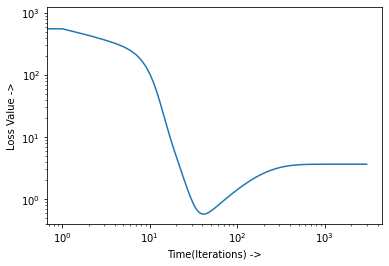

In [76]:
#k = 3

A2 = np.random.normal(0,1, size = (3,10))
A2_New = Gradient_Descent(A2, B, 0.003)


In [77]:
B2_New = np.matmul(np.transpose(A2_New), A2_New)
print('New Calculated B - \n\n', B2_New)

print('\n\nDifference between New B and Original B - \n\n', np.subtract(B2_New, B))

New Calculated B - 

 [[ 4.52682834  2.19970468  0.68523017  0.861221    4.27888289 -2.13117115
  -0.95468631 -0.84987407  2.44580129 -1.3446229 ]
 [ 2.19970468  2.04356007  0.39277038  2.80003692  0.4819979  -2.48854835
  -0.97335037 -1.42174014  1.5576809   1.35939659]
 [ 0.68523017  0.39277038  1.39613397  2.22660158  0.29312928  0.92107213
  -0.7985741  -0.33307109  1.21116179 -1.02310531]
 [ 0.861221    2.80003692  2.22660158  8.93395847 -3.47693339 -1.93886579
  -2.36885614 -2.84223322  2.60566628  3.235288  ]
 [ 4.27888289  0.4819979   0.29312928 -3.47693339  6.71303273  0.10122722
   0.05644286  0.87815414  1.5439012  -4.38165113]
 [-2.13117115 -2.48854835  0.92107213 -1.93886579  0.10122722  4.5476747
   0.56478739  1.75648871 -0.85555817 -3.34278222]
 [-0.95468631 -0.97335037 -0.7985741  -2.36885614  0.05644286  0.56478739
   0.76859892  0.7753821  -1.10423515 -0.31272788]
 [-0.84987407 -1.42174014 -0.33307109 -2.84223322  0.87815414  1.75648871
   0.7753821   1.21937598 -0.9

Gradient Descent Successful


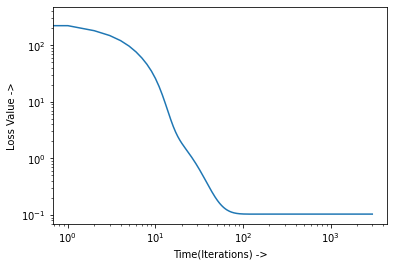

In [78]:
#k = 4

A3 = np.random.normal(0,1, size = (4,10))
A3_New = Gradient_Descent(A3, B, 0.003)


In [62]:
B3_New = np.matmul(np.transpose(A3_New), A3_New)
print('New Calculated B - \n\n', B3_New)

print('\n\nDifference between New B and Original B - \n\n', np.subtract(B3_New, B))

New Calculated B - 

 [[ 7.03929473  0.93907369  1.44238808  1.27724089  3.18566946 -2.4283148
  -0.88354513  0.73254229  0.86509635 -1.22989179]
 [ 0.93907369  2.67608216  0.01286611  2.59129877  1.03051817 -2.33945641
  -1.00904549 -2.21571817  2.35080022  1.30183022]
 [ 1.44238808  0.01286611  1.62431139  2.3519735  -0.03632197  0.83152479
  -0.77713497  0.14380655  0.7347999  -0.9885299 ]
 [ 1.27724089  2.59129877  2.3519735   9.00284399 -3.65795015 -1.98806751
  -2.35707642 -2.58021312  2.34392956  3.25428544]
 [ 3.18566946  1.03051817 -0.03632197 -3.65795015  7.188707    0.23051907
   0.02548822  0.18962003  2.23169065 -4.43157243]
 [-2.4283148  -2.33945641  0.83152479 -1.98806751  0.23051907  4.5828172
   0.55637369  1.56933994 -0.66861181 -3.3563512 ]
 [-0.88354513 -1.00904549 -0.77713497 -2.35707642  0.02548822  0.55637369
   0.77061331  0.82018865 -1.14899325 -0.30947924]
 [ 0.73254229 -2.21571817  0.14380655 -2.58021312  0.18962003  1.56933994
   0.82018865  2.21602276 -1.92

Gradient Descent Successful


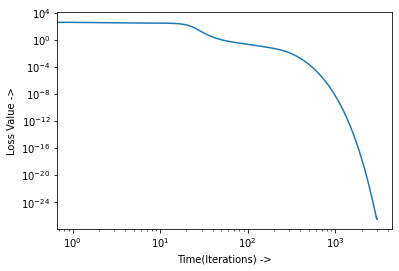

In [79]:
#k = 5

A4 = np.random.normal(0,1, size = (5,10))
A4_New = Gradient_Descent(A4, B, 0.003)

In [64]:
B4_New = np.matmul(np.transpose(A4_New), A4_New)
print('New Calculated B - \n\n', B4_New)

print('\n\nDifference between New B and Original B - \n\n', np.subtract(B4_New, B))

New Calculated B - 

 [[ 7.04830862  0.97508543  1.46029965  1.26154893  3.14396458 -2.44201078
  -0.84104839  0.71022245  0.86305928 -1.27233287]
 [ 0.97508543  2.81995399  0.08442527  2.52860724  0.86390145 -2.39417374
  -0.83926518 -2.30488897  2.34266185  1.13227229]
 [ 1.46029965  0.08442527  1.65990358  2.32079191 -0.11919402  0.80430941
  -0.69268941  0.09945466  0.73075203 -1.07286485]
 [ 1.26154893  2.52860724  2.32079191  9.03016156 -3.58534764 -1.96422467
  -2.43105746 -2.54135732  2.34747582  3.32816957]
 [ 3.14396458  0.86390145 -0.11919402 -3.58534764  7.38166436  0.29388673
  -0.17113287  0.29288796  2.24111562 -4.23520888]
 [-2.44201078 -2.39417374  0.80430941 -1.96422467  0.29388673  4.60362729
   0.49180285  1.60325338 -0.66551663 -3.29186494]
 [-0.84104839 -0.83926518 -0.69268941 -2.43105746 -0.17113287  0.49180285
   0.97096769  0.71495994 -1.15859717 -0.5095712 ]
 [ 0.71022245 -2.30488897  0.09945466 -2.54135732  0.29288796  1.60325338
   0.71495994  2.27129024 -1.

Gradient Descent Successful


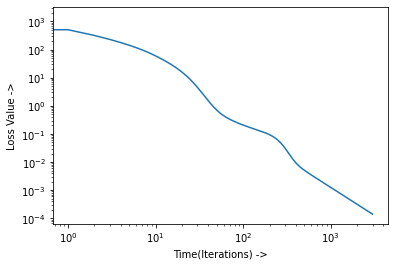

In [80]:
#k = 6

A5 = np.random.normal(0,1, size = (6,10))
A5_New = Gradient_Descent(A5, B, 0.003)


In [66]:
B5_New = np.matmul(np.transpose(A5_New), A5_New)
print('New Calculated B - \n\n', B5_New)

print('\n\nDifference between New B and Original B - \n\n', np.subtract(B5_New, B))

New Calculated B - 

 [[ 7.04840986  0.97506192  1.46070353  1.26094256  3.14355901 -2.4420169
  -0.84150173  0.71037222  0.86370091 -1.27209965]
 [ 0.97506192  2.81995945  0.08433149  2.52874804  0.86399563 -2.39417232
  -0.83915991 -2.30492375  2.34251286  1.13221813]
 [ 1.46070353  0.08433149  1.6615148   2.3183729  -0.12081196  0.804285
  -0.69449794  0.10005211  0.73331169 -1.07193447]
 [ 1.26094256  2.52874804  2.3183729   9.03379335 -3.58291853 -1.96418802
  -2.42834221 -2.54225431  2.34363286  3.32677273]
 [ 3.14355901  0.86399563 -0.12081196 -3.58291853  7.38328906  0.29391125
  -0.16931679  0.29228802  2.23854527 -4.23614315]
 [-2.4420169  -2.39417232  0.804285   -1.96418802  0.29391125  4.60362766
   0.49183025  1.60324433 -0.66555541 -3.29187903]
 [-0.84150173 -0.83915991 -0.69449794 -2.42834221 -0.16931679  0.49183025
   0.9729977   0.71428933 -1.16147029 -0.51061552]
 [ 0.71037222 -2.30492375  0.10005211 -2.54225431  0.29228802  1.60324433
   0.71428933  2.27151177 -1.921

Gradient Descent Successful


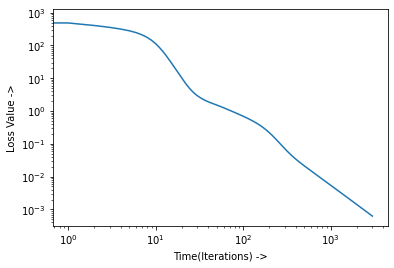

In [81]:
#k = 7

A6 = np.random.normal(0,1, size = (7,10))
A6_New = Gradient_Descent(A6, B, 0.003)


In [68]:
B6_New = np.matmul(np.transpose(A6_New), A6_New)
print('New Calculated B - \n\n', B6_New)

print('\n\nDifference between New B and Original B - \n\n', np.subtract(B6_New, B))

New Calculated B - 

 [[ 7.04980317  0.97313594  1.45955633  1.26088673  3.143062   -2.44088815
  -0.83971471  0.70888518  0.86566864 -1.27130037]
 [ 0.97313594  2.82278712  0.08450755  2.53040793  0.86551875 -2.39532609
  -0.83973047 -2.30258699  2.33909971  1.13090821]
 [ 1.45955633  0.08450755  1.66298625  2.31825661 -0.12009034  0.80279711
  -0.69724912  0.09841477  0.72993881 -1.07332551]
 [ 1.26088673  2.53040793  2.31825661  9.03347976 -3.5835273  -1.96371479
  -2.42753415 -2.53896451  2.34580803  3.32765629]
 [ 3.143062    0.86551875 -0.12009034 -3.5835273   7.38287647  0.29368178
  -0.17000627  0.29454097  2.23929952 -4.23585862]
 [-2.44088815 -2.39532609  0.80279711 -1.96371479  0.29368178  4.60480599
   0.49417473  1.60284841 -0.66372699 -3.29110797]
 [-0.83971471 -0.83973047 -0.69724912 -2.42753415 -0.17000627  0.49417473
   0.97775387  0.71621531 -1.15696459 -0.50872575]
 [ 0.70888518 -2.30258699  0.09841477 -2.53896451  0.29454097  1.60284841
   0.71621531  2.27355829 -1.

Gradient Descent Successful


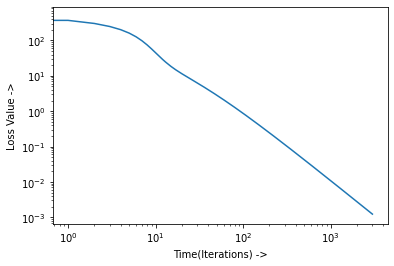

In [82]:
#k = 8

A7 = np.random.normal(0,1, size = (8,10))
A7_New = Gradient_Descent(A7, B, 0.003)


In [70]:
B7_New = np.matmul(np.transpose(A7_New), A7_New)
print('New Calculated B - \n\n', B7_New)

print('\n\nDifference between New B and Original B - \n\n', np.subtract(B7_New, B))

New Calculated B - 

 [[ 7.05091651  0.9754342   1.45781899  1.2602475   3.14224041 -2.43895697
  -0.84260159  0.70791911  0.86368306 -1.27171387]
 [ 0.9754342   2.82695203  0.08620385  2.52698486  0.86398304 -2.39057774
  -0.84010311 -2.30078361  2.34163015  1.1354456 ]
 [ 1.45781899  0.08620385  1.66491232  2.32161773 -0.11581057  0.80314024
  -0.69114376  0.10002594  0.72662203 -1.07157603]
 [ 1.2602475   2.52698486  2.32161773  9.03111316 -3.58452963 -1.96640224
  -2.43014748 -2.54116804  2.34735297  3.32722965]
 [ 3.14224041  0.86398304 -0.11581057 -3.58452963  7.38417156  0.29264127
  -0.16992125  0.29217965  2.23802797 -4.23470824]
 [-2.43895697 -2.39057774  0.80314024 -1.96640224  0.29264127  4.60895861
   0.48979431  1.60144835 -0.66652038 -3.28936373]
 [-0.84260159 -0.84010311 -0.69114376 -2.43014748 -0.16992125  0.48979431
   0.97198343  0.71554921 -1.15928086 -0.51009866]
 [ 0.70791911 -2.30078361  0.10002594 -2.54116804  0.29217965  1.60144835
   0.71554921  2.28048764 -1.



# Analysing the Results

1. From the above results we can clearly see that, for all k values, the Loss Values are decreasing. But, all of them except when k = 5, are far from the desired result. 


2. In the case of k = 3 and k = 4, the Loss values are comparitively huge and do not actually converge to 0. The losses also plateu after a certain point and we see no decrease in the loss. And thus, we do not get close to the desired B.


3. In the case of k > = 6, the Loss values are comparitively smaller than when k < 5 and are constantly decreasing, but the time taken to converge to 0 is too slow. It might be the case that if the run the Gradient Descent algorithm for more iterations, we could get smaller losses but that would be sub-optimal.


4. In the case of k = 5, the Loss values are in the order of 10^-28 after 3000 iterations, which is significantly smaller than other k. Hence, we are able to achieve the desired result and the difference between the new calculated B and the original B matrix are insignificant. 


5. Thus, we can clearly see that we were able to find the original k when we try to apply gradient descent to matrices of different k size.

### 4. What happens if you try to take B as the identity matrix? What does the solution A represent (for any k that works)?

### Taking B to be an Identity Matrix

B_Identity - 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Gradient Descent Successful


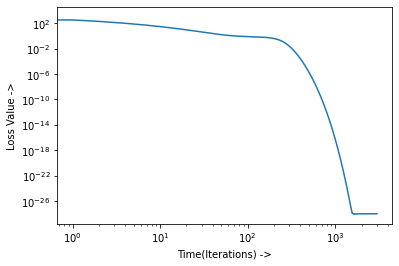

In [98]:
B_Identity = np.identity(10)
print('B_Identity - \n\n', B_Identity)

A8_Identity = np.random.normal(0,1, size = (10,10))
A8_New = Gradient_Descent(A8_Identity, B_Identity, 0.003)

In [99]:
print('New Calculated A - \n\n', A8_New)

B8_New = np.matmul(np.transpose(A8_New), A8_New)
print('\n\nNew Calculated B - \n\n', B8_New)

print('\n\nDifference between New B and Original B - \n\n', np.subtract(B8_New, B_Identity))

New Calculated A - 

 [[-2.02405217e-01 -2.69830236e-01  5.59323836e-01  2.83630283e-02
   7.81225819e-02  2.93408440e-02  1.79421195e-01  3.39239124e-01
   2.46981597e-01  5.97776778e-01]
 [ 2.39391987e-01 -3.37713511e-01 -1.73266737e-01 -1.37998451e-01
   4.56203477e-01  4.47783874e-01 -2.69052553e-01 -4.41923897e-01
   1.07426241e-01  3.02849323e-01]
 [ 1.68181075e-01 -5.04207356e-01  2.54210017e-01 -1.03544335e-01
   4.81123936e-02 -3.54517837e-01  4.12557434e-01 -3.50917767e-01
  -4.51359473e-01 -1.30674855e-01]
 [-8.83769152e-02 -2.54328309e-01 -2.91080134e-01  3.62119436e-02
   1.31855953e-01 -7.57943974e-01 -3.95316484e-01  2.05663010e-02
   2.70085353e-01  1.41274306e-01]
 [-5.62142109e-01  6.40928168e-02  4.35301867e-01 -1.90575929e-01
   3.85937987e-01  1.31877023e-02 -3.11317541e-01 -1.56855200e-01
   2.08122304e-06 -4.28295750e-01]
 [ 8.41021089e-02 -7.53410437e-02  3.00083002e-02 -3.84199697e-01
  -2.15135465e-01 -9.69211335e-03  3.24991211e-01 -2.20560212e-01
   7.518639

# Analysing the Results

Here the resultant A that we get in A8_New, the product with its transpose gives the identity matrix. So we can say that the columns of the new A are orthonormal to each other. Only the product of columns with themselves will give 1 in the diagonal elements. All the other products will give a 0. So, we can say that all the columns of A are othogonal to each other.

### 5. What happens if you try to take B as the diagonal matrix of all 1s, except for the bottom right corner which is −1? What does the solution A represent (for any k that works)?


### Taking B as the diagonal matrix of all 1s, except for the bottom right corner which is −1

B_Diagonal

 [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.]]
Gradient Descent Successful


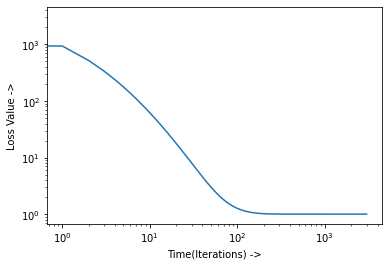

In [120]:
B_Diagonal = np.identity(10)
B_Diagonal[9,9] = -1
print('B_Diagonal\n\n', B_Diagonal)

A9_Diagonal = np.random.normal(0,1, size = (10,10))
A9_Diagonal_New = Gradient_Descent(A9_Diagonal, B_Diagonal, 0.003)

In [121]:
print('New Calculated A - \n\n', A9_Diagonal_New)

B_Diagonal_New = np.matmul(np.transpose(A9_Diagonal_New), A9_Diagonal_New)
print('\n\nNew Calculated B - \n\n', B_Diagonal_New)

print('\n\nDifference between New B and Original B - \n\n', np.subtract(B_Diagonal_New, B_Diagonal))

New Calculated A - 

 [[-2.40948001e-01 -4.59998813e-02  5.56179050e-01  3.66482793e-01
  -3.06369973e-01  4.47949938e-01 -9.74307176e-02  4.91552405e-02
   3.68017444e-01  3.06715891e-17]
 [-2.84950537e-01  2.81589278e-01 -1.38824437e-01 -2.19307101e-01
  -6.90973201e-02  2.14496818e-01  2.35561596e-02  5.59084981e-01
   2.59520893e-01 -7.68373691e-17]
 [-8.11017718e-02 -1.69881238e-01 -3.46338497e-01  1.17748511e-01
   4.58138880e-01 -1.51811208e-01  4.03460784e-02  1.97579699e-01
   6.50634614e-01  4.81428912e-17]
 [ 1.45625166e-01 -2.69630237e-02  1.82487207e-02  1.28730932e-01
  -9.79652967e-02 -1.16456481e-01  3.27862460e-01 -5.87769451e-01
   4.80788380e-01 -6.63110589e-17]
 [ 6.73812647e-01 -1.13952241e-01  7.95620419e-02 -4.72150600e-01
  -2.48285927e-01  8.07141344e-02 -3.37349048e-01  1.11916955e-01
   3.22865896e-01  9.30799332e-18]
 [-3.41933522e-01  1.59363932e-01  1.47737030e-02 -2.24167908e-02
  -4.18505728e-01 -6.92982550e-01 -4.16633330e-01 -4.28823778e-02
   1.526444

## Analysing the Results

Here when we select B as the diagonal matrix of all 1s, except for the bottom right corner which is −1, we are not able to reproduce the matrix from the A we get after Gradient Descent. The bottom corner value comes out to be really small close to 0, but not -1. 